# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [14]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix (X.T @ X)
    X_cov = np.dot(X_train.T, X_train)

    # Step 2: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(X_cov)

    # Step 3: Take only the real part of eigenvalues and eigenvectors
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Step 6: Project the train and test data onto the reduced-dimensional space
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)

    return X_train_reduced, X_test_reduced, top_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [15]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [21]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

svd_components = [5, 10, 20, 50, 100, 200, 300, 500, 784]


# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results for later analysis
    results.append({
        'components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Display the final results
print("\nResults Summary:")
for result in results:
    print(f"Components: {result['components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6660, Training time: 4.7394 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8019, Training time: 4.1942 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8781, Training time: 3.8174 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9088, Training time: 6.1709 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9179, Training time: 13.0441 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 23.7038 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9201, Training time: 38.6126 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9208, Training time: 69.3641 seconds
Applying custom SVD with 784 components...
SVD c

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


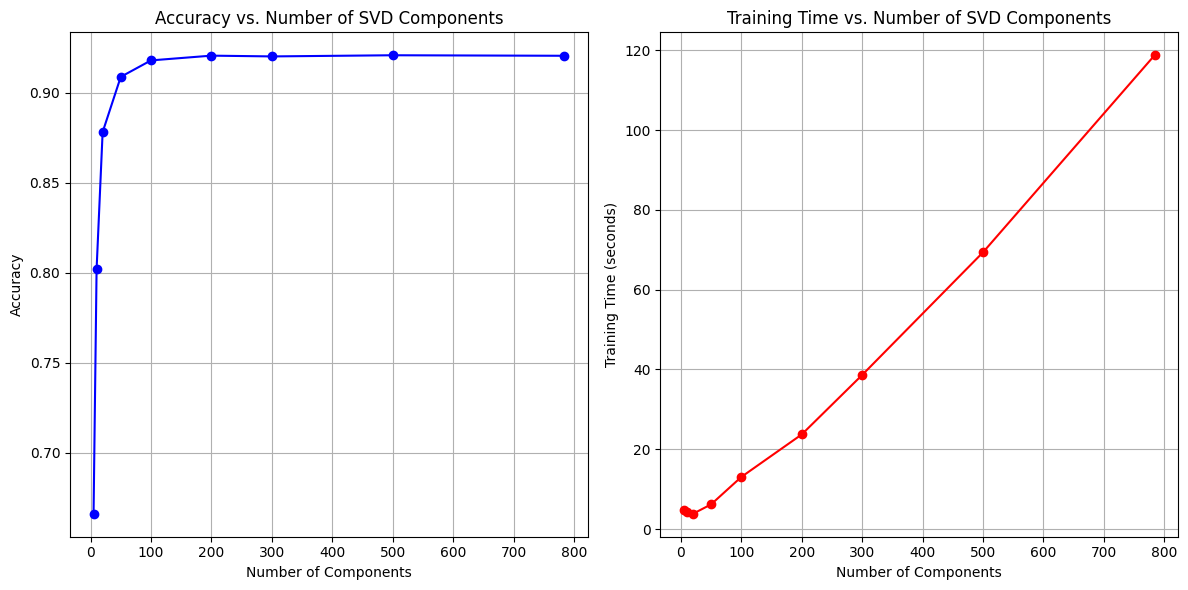

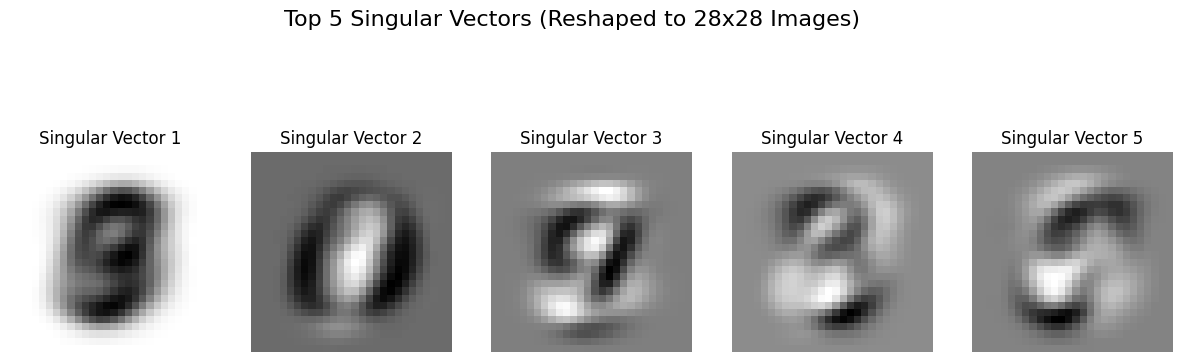

In [22]:
import matplotlib.pyplot as plt

components = [result['components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='r', label='Training Time')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('Top 5 Singular Vectors (Reshaped to 28x28 Images)', fontsize=16)

for i in range(5):
    singular_vector = top_eigenvectors[:, i]
    singular_vector_image = singular_vector.reshape(28, 28)

    axes[i].imshow(singular_vector_image, cmap='gray')
    axes[i].set_title(f'Singular Vector {i+1}')
    axes[i].axis('off')

plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER: We can clearly observe that the higher number of SDV components, the greater is the accuracy but also the longer it takes to train. This relationship makes sense as logically the longer it takes and the more values it has the more accurate it will be. Out of the top 5 Singular Vector I find the number 4 to look best for me, we can see a pattern/a more clear image, in this case it looks like the number 3.